In [77]:
import pandas as pd

In [78]:
df = pd.read_csv("../csv/Sales Records.csv")
df.head(1)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,Chad,Office Supplies,Online,L,1/27/2011,292494523,2/12/2011,4484,651.21,524.96,2920025.64,2353920.64,566105.0


In [79]:
# 복습
# 1. order date 값을 시계결 변경
# 2. order week 컬럼을 생성하여 요일 데이터 저장
# 3. 국가, 요일별, Total Prifit의 평균 합계를 구하시오

In [80]:
df["Order Date"] = pd.to_datetime(df["Order Date"], format="%m/%d/%Y")

In [81]:
df.head(5)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,Chad,Office Supplies,Online,L,2011-01-27,292494523,2/12/2011,4484,651.21,524.96,2920025.64,2353920.64,566105.00
1,Europe,Latvia,Beverages,Online,C,2015-12-28,361825549,1/23/2016,1075,47.45,31.79,51008.75,34174.25,16834.50
2,Middle East and North Africa,Pakistan,Vegetables,Offline,C,2011-01-13,141515767,2/1/2011,6515,154.06,90.93,1003700.90,592408.95,411291.95
3,Sub-Saharan Africa,Democratic Republic of the Congo,Household,Online,C,2012-09-11,500364005,10/6/2012,7683,668.27,502.54,5134318.41,3861014.82,1273303.59
4,Europe,Czech Republic,Beverages,Online,C,2015-10-27,127481591,12/5/2015,3491,47.45,31.79,165647.95,110978.89,54669.06


In [105]:
df["Order week"] = df["Order Date"].dt.day_name()
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order week
0,Sub-Saharan Africa,Chad,Office Supplies,Online,L,2011-01-27,292494523,2/12/2011,4484,651.21,524.96,2920025.64,2353920.64,566105.00,Thursday
1,Europe,Latvia,Beverages,Online,C,2015-12-28,361825549,1/23/2016,1075,47.45,31.79,51008.75,34174.25,16834.50,Monday
2,Middle East and North Africa,Pakistan,Vegetables,Offline,C,2011-01-13,141515767,2/1/2011,6515,154.06,90.93,1003700.90,592408.95,411291.95,Thursday
3,Sub-Saharan Africa,Democratic Republic of the Congo,Household,Online,C,2012-09-11,500364005,10/6/2012,7683,668.27,502.54,5134318.41,3861014.82,1273303.59,Tuesday
4,Europe,Czech Republic,Beverages,Online,C,2015-10-27,127481591,12/5/2015,3491,47.45,31.79,165647.95,110978.89,54669.06,Tuesday


In [ ]:
df.groupby(["Country","Order week"]).agg(["mean", "sum"])["Total Profit"]

C:\Users\이주노\AppData\Local\Temp\ipykernel_91272\3464499008.py:1: FutureWarning: ['Region', 'Item Type', 'Sales Channel', 'Order Priority', 'Order Date', 'Ship Date'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby(["Country","Order week"]).agg(["mean", "sum"])["Total Profit"]


mean         sum
Country     Order week                           
Afghanistan 0           278274.641818  3061021.06
            1           553721.460000  4429771.68
            2           396777.523636  4364552.76
            3           304958.776667   914876.33
            4           376621.976364  4142841.74
...                               ...         ...
Zimbabwe    2           506777.501875  8108440.03
            3           249511.857143  1746583.00
            4           368703.056000  1843515.28
            5           114521.195000   916169.56
            6           449273.867143  3144917.07

[1294 rows x 2 columns]

In [ ]:
df.groupby(["Country","Order week"])["Total Profit"].agg(["mean", "sum"])

mean         sum
Country     Order week                           
Afghanistan 0           278274.641818  3061021.06
            1           553721.460000  4429771.68
            2           396777.523636  4364552.76
            3           304958.776667   914876.33
            4           376621.976364  4142841.74
...                               ...         ...
Zimbabwe    2           506777.501875  8108440.03
            3           249511.857143  1746583.00
            4           368703.056000  1843515.28
            5           114521.195000   916169.56
            6           449273.867143  3144917.07

[1294 rows x 2 columns]

In [ ]:
# corona 
# 1.파일로드
# 2.creatDt를 시계열 변환
# 4.요일 컬럼 생성 요일 대입
# 5.creatdt 기준 오르차순 정렬
# 5.일일 확진자 컬럼 생성 decidecnt의 차이를 대입
# 6.요일별 일일 확진자의 평균값
# 7.요일별 일일 확진자를 시각화


In [ ]:
df = pd.read_csv("../csv/corona.csv")
df.head(3)

,Unnamed: 0,createDt,deathCnt,decideCnt,seq,stateDt,stateTime,updateDt,accExamCnt,accDefRate
0,0,2022-06-08 09:09:05.982,24305,18188200,904,20220608,00:00,NaN,NaN,NaN
1,1,2022-06-07 09:09:00.897,24299,18174842,903,20220607,00:00,2022-06-08 09:10:36.846,NaN,NaN
2,2,2022-06-06 09:00:06.734,24279,18168670,902,20220606,00:00,2022-06-08 09:10:50.441,NaN,NaN


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df["createDt"] = pd.to_datetime(df["createDt"],format="%Y-%m-%d")

In [ ]:
df["요일"] = df["createDt"].dt.day_name()

In [ ]:
df.sort_values(["createDt"], inplace=True)

In [ ]:
df["일일확진자"] = df["decideCnt"].diff()

In [ ]:
a = df.groupby("요일")["일일확진자"].mean()  #스리즈의 형태

# df.groupby("요일")[["일일확진자"]].mean() > 데이터프레임 

# df.groupby("요일")["일일확진자"].agg(["mean"]) > 데이터프레임
a

요일
Friday       22542.854701
Monday       14862.586207
Saturday     22555.948718
Sunday       20628.745763
Thursday     25776.267241
Tuesday      21969.837607
Wednesday    26994.550847
Name: 일일확진자, dtype: float64

In [ ]:
df.groupby("요일").sum().index

C:\Users\이주노\AppData\Local\Temp\ipykernel_91272\1778658911.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("요일").sum().index


Index(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object', name='요일')

C:\Users\이주노\AppData\Local\Temp\ipykernel_91272\1605758789.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.bar(df.groupby("요일").sum().index, a, color = "g", alpha = 0.6)


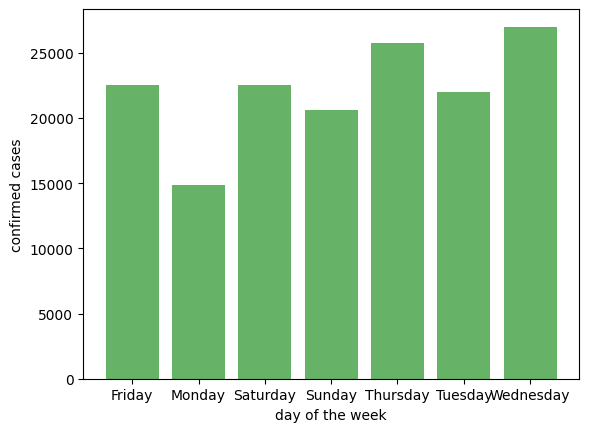

In [ ]:
plt.bar(df.groupby("요일").sum().index, a, color = "g", alpha = 0.6)
plt.xlabel("day of the week")
plt.ylabel("confirmed cases")
plt.show()

C:\Users\이주노\AppData\Local\Temp\ipykernel_91272\3008810097.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.barh(df.groupby("요일").sum().index, a, color = "g", alpha = 0.6)


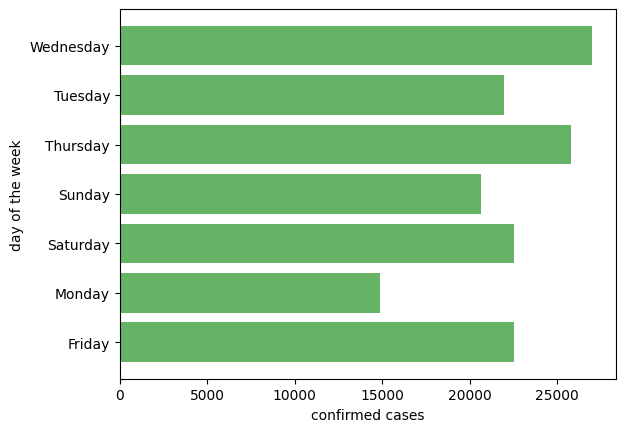

In [ ]:
plt.barh(df.groupby("요일").sum().index, a, color = "g", alpha = 0.6)
plt.xlabel("confirmed cases")
plt.ylabel("day of the week")
plt.show()